In [7]:
import pandas as pd
import numpy as np
from HullWhite import HullWhite
from scipy.optimize import fsolve
S = np.arange(0,11)
T = np.arange(0,10.5,0.5)
beta = np.array([1.879892, 0.579211, 	3.993992, 1.445091])
tau  = np.array([ 16.633491, 	0.319680])
reversion=0.13949636660880768 
volatility=0.017793899652989272
# HW = HullWhite(initial=0.02459103, reversion=0.03, volatility=0.00200, Gamma=1000, b=beta, tau=tau)
HW = HullWhite(initial=0.02459103, reversion=reversion, volatility=volatility, b=beta, tau=tau)
K=fsolve(lambda x: HW.swap(0, S, T, x), x0=0.02)[0]

In [8]:
Te=0.52
HW.swaption(0,Te, S, T, K)

Started Riemann Sum, 0.52, drTe=0.0012441956374934782, drTR=0.0012216968882598767, sdTe=0.012379746593060131, sdTR=0.012155884038185743


0.018773291573070245

In [9]:
len(np.arange(0,1+0.1,0.1))*35/60

6.416666666666667

In [10]:
from scipy.stats import multivariate_normal as mvn

f= lambda x,y: mvn.pdf( [x,y], mean=[HW.expectedRate(Te),HW.expectedRate(0.5)], cov=HW.C(0,Te,0.5))

from scipy.integrate import dblquad
factor = 20
sdTe =factor*np.sqrt(HW.variance(Te))
sdT = factor*np.sqrt(HW.variance(0.5))
dblquad(f, -sdTe, sdTe, lambda x: -sdT, lambda x: sdT), dblquad(f, -sdT, sdT, lambda x: -sdTe, lambda x: sdTe)


((0.9999999998779945, 1.3622854081705756e-07),
 (0.9999999998858804, 2.1376643372421832e-07))

In [11]:
10-2/365- 9.994520547945205

0.0

In [12]:
dt=1/12
lag=2/365
time = np.arange(0,10+dt,dt)
lagged_time = time[0:len(time)-2]
VM = []
ts=1
if dt==1/365:
    ts+=2
for t in enumerate(time):
    if t[1]-lag<=0:
        VM.append(0)
        continue
    if t[1]>=time[-1]:
        VM.append(0)
        break
    VMhat = VM[t[0]-ts]/HW.ZCB(time[t[0]-1]-lag, time[t[0]]-lag, initRate=np.random.uniform(-0.05,0.05)) # VM hat in eq 3.2 everything...
    VMta  = VMhat #(ta: to append) 
    
    VM.append(VMta)
time[np.where(time <=10)]
# len(VM), len(time), VM


array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
        0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667,
        1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333,
        1.66666667,  1.75      ,  1.83333333,  1.91666667,  2.        ,
        2.08333333,  2.16666667,  2.25      ,  2.33333333,  2.41666667,
        2.5       ,  2.58333333,  2.66666667,  2.75      ,  2.83333333,
        2.91666667,  3.        ,  3.08333333,  3.16666667,  3.25      ,
        3.33333333,  3.41666667,  3.5       ,  3.58333333,  3.66666667,
        3.75      ,  3.83333333,  3.91666667,  4.        ,  4.08333333,
        4.16666667,  4.25      ,  4.33333333,  4.41666667,  4.5       ,
        4.58333333,  4.66666667,  4.75      ,  4.83333333,  4.91666667,
        5.        ,  5.08333333,  5.16666667,  5.25      ,  5.33333333,
        5.41666667,  5.5       ,  5.58333333,  5.66666667,  5.75

In [13]:
len(time)

122

In [14]:
np.arange(0,15+dt,dt)[-1]

15.083333333333332

In [15]:
np.sum(np.linspace(0,1,int(1/dt)+1)-np.arange(0,1+dt,dt))

0.0

In [16]:
from scipy.stats import norm
from scipy.optimize import minimize
minimize(fun=lambda x: abs(norm.cdf(x)-norm.cdf(-x)-0.95), x0=1.01).x

array([1.95996398])

In [17]:
from defaultCurves import *

In [18]:
lI(10)

0.010490000000000001

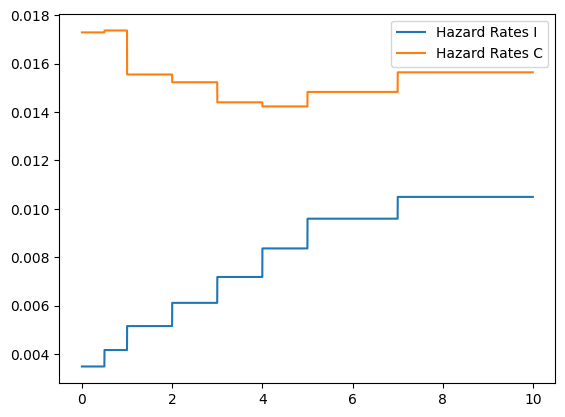

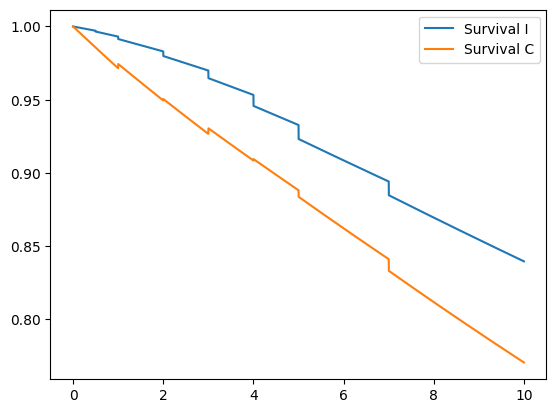

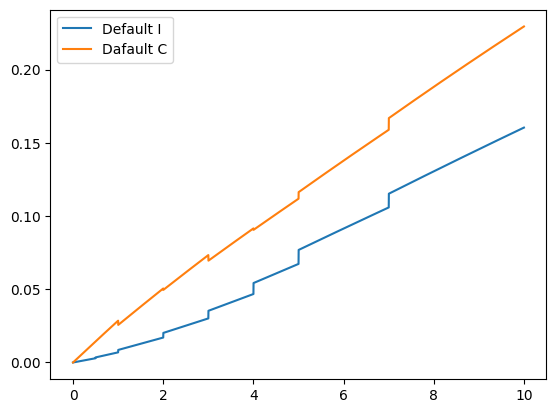

In [19]:
import seaborn as sns
sns.lineplot(x=np.arange(0, 10, 1/365), y=[lI(t) for t in np.arange(0, 10, 1/365)], label='Hazard Rates I')
sns.lineplot(x=np.arange(0, 10, 1/365), y=[lC(t) for t in np.arange(0, 10, 1/365)], label='Hazard Rates C')
plt.show()

sns.lineplot(x=np.arange(0, 10, 1/365), y=[SI(t) for t in np.arange(0, 10, 1/365)], label='Survival I')
sns.lineplot(x=np.arange(0, 10, 1/365), y=[SC(t) for t in np.arange(0, 10, 1/365)], label='Survival C')
plt.show()

sns.lineplot(x=np.arange(0, 10, 1/365), y=[QI(t) for t in np.arange(0, 10, 1/365)], label='Default I')
sns.lineplot(x=np.arange(0, 10, 1/365), y=[QC(t) for t in np.arange(0, 10, 1/365)], label='Dafault C')
plt.show()

In [3]:
import numpy as np
np.sum(np.arange(1,101))

5050

In [5]:
np.arange(0,10+1/12,1/12)

array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
        0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667,
        1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333,
        1.66666667,  1.75      ,  1.83333333,  1.91666667,  2.        ,
        2.08333333,  2.16666667,  2.25      ,  2.33333333,  2.41666667,
        2.5       ,  2.58333333,  2.66666667,  2.75      ,  2.83333333,
        2.91666667,  3.        ,  3.08333333,  3.16666667,  3.25      ,
        3.33333333,  3.41666667,  3.5       ,  3.58333333,  3.66666667,
        3.75      ,  3.83333333,  3.91666667,  4.        ,  4.08333333,
        4.16666667,  4.25      ,  4.33333333,  4.41666667,  4.5       ,
        4.58333333,  4.66666667,  4.75      ,  4.83333333,  4.91666667,
        5.        ,  5.08333333,  5.16666667,  5.25      ,  5.33333333,
        5.41666667,  5.5       ,  5.58333333,  5.66666667,  5.75